# wind scenarios

1. Normal wind speed model + Normal turbulence model;
2. Normal wind speed model + extreme turbulence model;
3. extreme wind speed model + normal turbulence model;

In [1]:
import numpy as np
from params import Params
import matplotlib.pyplot as plt

In [13]:
from wind_load import Wind_load
from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
params = Params()

## Normal wind conditions

In [ ]:
wl_nn = Wind_load(time=200, hyperparameters=params, V_hub=8.6, fs=5) 

In [ ]:
# mean and sigma for a i.i.d Gaussian distribution

mean, sigma = wl_nn.get_wind_speed_z(wind_model='normal', turbulence_model='normal')

In [ ]:
# mean

In [ ]:
# for each height, there is a i.i.d Gaussian process 

In [ ]:
ts_winds_z = wl_nn.get_wind_speed_series(mean, sigma)

In [ ]:
ts_winds_z.shape

In [ ]:
wl_nn.plot_wind_speed_series(ts=ts_winds_z, node_index=-1)

In [ ]:
wind_loads = wl_nn.get_wind_loads(wind_speed_series=ts_winds_z)

In [ ]:
wind_loads.shape

In [ ]:
wl_nn.plot_wind_loads(wind_loads=wind_loads, node_index=-1)

In [ ]:
wl_nn.save_wind_load_series(wind_loads)

## 6.2 scenario - `Extreme wind speed` + `Normal turbulence wind` = EN

In [4]:
# In the event of NTM case, Merhad said V_hub = 0.7 * V_ref

wl_EN = Wind_load(time=200, hyperparameters=params, V_hub=params.V_ref, fs=2) 

In [5]:
# to test the average wind speed
# 15 elements

ave_ws_elements, sigma = wl_EN.get_wind_speed_z_interpolation(wind_model='extreme', turbulence_model='normal')

In [6]:
ave_ws_elements.shape

(15,)

In [7]:
# the element_average speed at each height
ave_ws_elements

array([39.4430644 , 42.56806883, 44.50963026, 45.94066186, 47.08226519,
       47.42313977, 47.74527306, 48.05072655, 48.34123396, 48.61826777,
       48.88308955, 49.13678877, 49.38031294, 49.61449145, 49.84005456])

In [8]:
# params.cross_sec_area.shape

In [9]:
# # the wind speed time series at height z

winds_series_avespeed = wl_EN.get_wind_speed_series(ave_ws_elements, sigma)

In [10]:
winds_series_avespeed.shape

(15, 400)

### compute the top nodal force at hub height

In [ ]:
# compute the load for the rotor at the hub
F_hub = wl_EN.cp_wind_loads_F_hub(sigma=sigma)

In [ ]:
F_hub.shape

In [ ]:
# pad zeros to the end .. 60 seconds
F_hub_0padded = wl_EN.zero_padding(input_series=F_hub, duration=60)

In [ ]:
F_hub_0padded.shape

In [ ]:
F_hub_0padded[-80:]

In [ ]:
# wl_EN.save_wind_load_series(ts=F_hub_0padded, name='load_nodal_hub_0padded', style='ignore')

### check the wind speed at a certain heigh

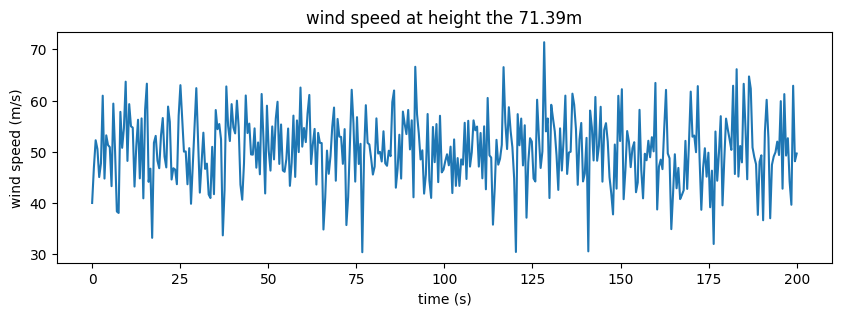

In [14]:
# plot the wind speed series at the highest node

wl_EN.plot_wind_speed_series(winds_series_avespeed, node_index=-1)
save2Vis('iidGaussian_wind_velocity')

### compute drag force for the tower

In [ ]:
# computing drag force `f` for the elements

ft = wl_EN.cp_dragforce_f(wind_speed_series=winds_series_avespeed)

In [ ]:
ft.shape

In [ ]:
# pad zeros to the end .. 60 seconds
ft_0padded = wl_EN.zero_padding(input_series=ft, duration=60)

In [ ]:
ft_0padded.shape

In [ ]:
# # save it to Francesca
# wl_EN.save_wind_load_series(ts=ft_0padded, name='load_elements_0padded', style='Francesca')